Compute Acceleration: ENABLED
Device Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[System] Loading MNIST dataset...

[Data Stats] Input Tensor Shape: (60000, 28, 28)
[Data Stats] Data Type: uint8 (Expected: uint8)
[Data Stats] Value Range: [0, 255]


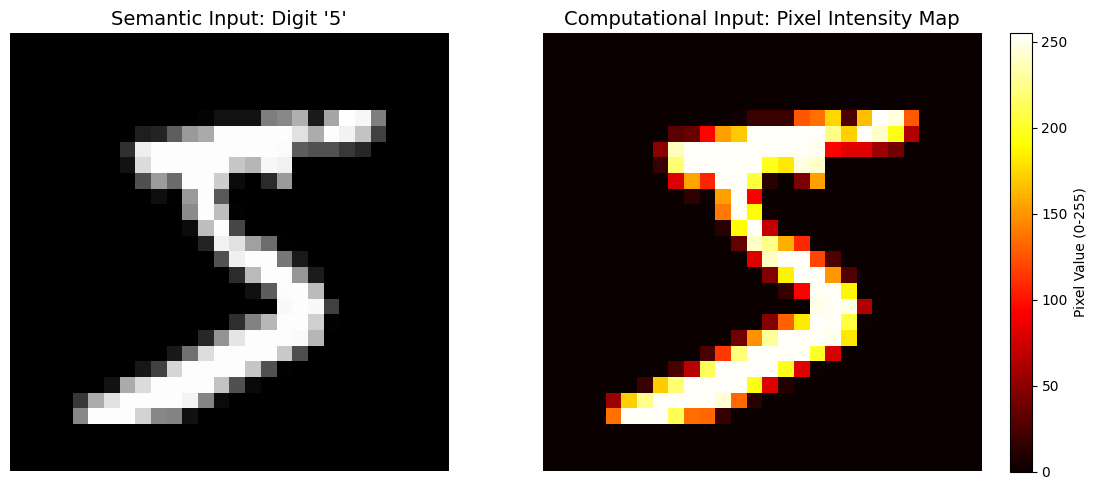

--------------------------------------------------
RAW MEMORY DUMP (Center 14x14 Crop)
--------------------------------------------------
[[ 49 238 253 253 253 253 253 253 253 253 251  93  82  82]
 [ 18 219 253 253 253 253 253 198 182 247 241   0   0   0]
 [  0  80 156 107 253 253 205  11   0  43 154   0   0   0]
 [  0   0  14   1 154 253  90   0   0   0   0   0   0   0]
 [  0   0   0   0 139 253 190   2   0   0   0   0   0   0]
 [  0   0   0   0  11 190 253  70   0   0   0   0   0   0]
 [  0   0   0   0   0  35 241 225 160 108   1   0   0   0]
 [  0   0   0   0   0   0  81 240 253 253 119  25   0   0]
 [  0   0   0   0   0   0   0  45 186 253 253 150  27   0]
 [  0   0   0   0   0   0   0   0  16  93 252 253 187   0]
 [  0   0   0   0   0   0   0   0   0   0 249 253 249  64]
 [  0   0   0   0   0   0   0  46 130 183 253 253 207   2]
 [  0   0   0   0   0  39 148 229 253 253 253 250 182   0]
 [  0   0   0  24 114 221 253 253 253 253 201  78   0   0]]


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# PART 1: SYSTEM VERIFICATION
# ==========================================
# Verification of the Apple Silicon (M-Series) GPU acceleration.
# This ensures that TensorFlow is correctly mapping operations to the Metal API.
physical_devices = tf.config.list_physical_devices('GPU')
print(f"Compute Acceleration: {'ENABLED' if physical_devices else 'DISABLED'}")
print(f"Device Details: {physical_devices}")

# ==========================================
# PART 2: DATA INGESTION
# ==========================================
# Loading the MNIST dataset (Heuristic benchmark for hardware verification).
# We inspect the raw data types to ensure they match our C++ accelerator's expectations (uint8).
print("\n[System] Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Architecture Note: 
# The C++ accelerator expects a flat stream of bytes or integers. 
# We verify the input dimensions [Batch, Height, Width] and data precision.
print(f"\n[Data Stats] Input Tensor Shape: {x_train.shape}")
print(f"[Data Stats] Data Type: {x_train.dtype} (Expected: uint8)")
print(f"[Data Stats] Value Range: [{x_train.min()}, {x_train.max()}]")

# ==========================================
# PART 3: VISUALIZATION (HUMAN vs MACHINE)
# ==========================================
# Visualizing the difference between the semantic representation (image)
# and the computational representation (pixel intensity matrix).

index = 0
image = x_train[index]
label = y_train[index]

plt.figure(figsize=(12, 5))

# Plot 1: Semantic View (What the user sees)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"Semantic Input: Digit '{label}'", fontsize=14)
plt.axis('off')

# Plot 2: Intensity View (What the ALU processes)
# Using a heatmap to highlight the non-zero values that drive computation.
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='hot', interpolation='nearest')
plt.title("Computational Input: Pixel Intensity Map", fontsize=14)
plt.colorbar(label='Pixel Value (0-255)')
plt.axis('off')

plt.tight_layout()
plt.show()

# ==========================================
# PART 4: RAW MEMORY DUMP
# ==========================================
# Inspecting the raw integer matrix. 
# These are the exact values that will be loaded into the simulator's memory.
# Note the sparsity (zeros) around the edges.
print("-" * 50)
print(f"RAW MEMORY DUMP (Center 14x14 Crop)")
print("-" * 50)
print(image[7:21, 7:21])